In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
import os
import sys

isColab = "google.colab" in sys.modules

if isColab:
    os.environ["SDL_VIDEODRIVER"] = "dummy"
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

    colab_path = ("/content/drive/My Drive")

Mounted at /content/drive


In [4]:
# List directories in the specified path to confirm their existence
try:
    base_path = "/content/drive/My Drive/DL2470 Final Project Group/EEG data"
    directories = os.listdir(base_path)
    print("Directories in the base path:", directories)
except FileNotFoundError as e:
    print(f"Failed to list directories in the base path due to: {e}")

Directories in the base path: ['EEG_data.csv']


## Data Preprocessing 👷 🔨


In [5]:
df = pd.read_csv('/content/drive/My Drive/DL2470 Final Project Group/EEG data/EEG_data.csv')

print(df.head())

   SubjectID  VideoID  Attention  Mediation    Raw      Delta     Theta  \
0        0.0      0.0       56.0       43.0  278.0   301963.0   90612.0   
1        0.0      0.0       40.0       35.0  -50.0    73787.0   28083.0   
2        0.0      0.0       47.0       48.0  101.0   758353.0  383745.0   
3        0.0      0.0       47.0       57.0   -5.0  2012240.0  129350.0   
4        0.0      0.0       44.0       53.0   -8.0  1005145.0  354328.0   

     Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  predefinedlabel  \
0   33735.0  23991.0  27946.0   45097.0  33228.0   8293.0              0.0   
1    1439.0   2240.0   2746.0    3687.0   5293.0   2740.0              0.0   
2  201999.0  62107.0  36293.0  130536.0  57243.0  25354.0              0.0   
3   61236.0  17084.0  11488.0   62462.0  49960.0  33932.0              0.0   
4   37102.0  88881.0  45307.0   99603.0  44790.0  29749.0              0.0   

   user-definedlabeln  
0                 0.0  
1                 0.0  
2       

In [6]:
df.nunique()

SubjectID                10
VideoID                  10
Attention                61
Mediation                61
Raw                    1104
Delta                 12280
Theta                 12070
Alpha1                11140
Alpha2                10910
Beta1                 10583
Beta2                 10936
Gamma1                10197
Gamma2                 8901
predefinedlabel           2
user-definedlabeln        2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


In [8]:
df['user-definedlabeln'].unique()

array([0., 1.])

In [9]:
df['Mediation'].unique()

array([ 43.,  35.,  48.,  57.,  53.,  66.,  69.,  61.,  38.,  34.,  30.,
        40.,  44.,  51.,  50.,  37.,  21.,  41.,  56.,  67.,  54.,  47.,
        63.,  80.,  60.,  74.,  64.,  75.,  70.,  81.,  78.,  87.,  83.,
        91.,  77.,  24.,  17.,  23.,  14.,  13.,  29.,  27.,  26.,  16.,
        20.,   8.,   0.,  11., 100.,  88.,  10.,   4.,   7.,   1.,  84.,
        90.,  93.,   3.,  94.,  96.,  97.])

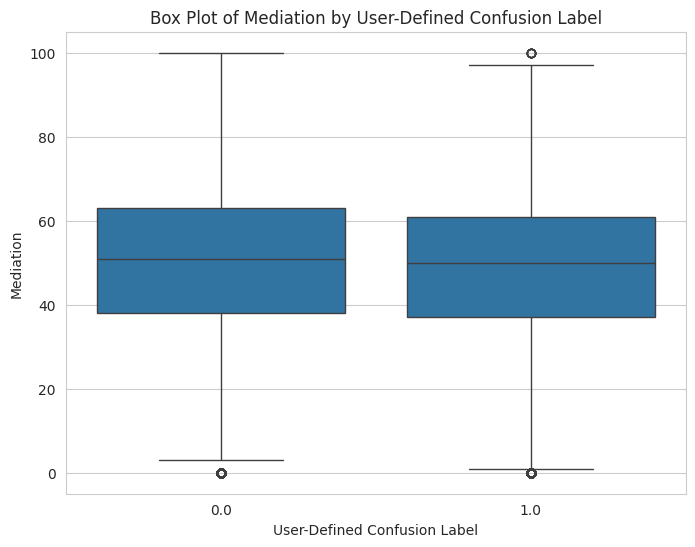

In [10]:
# According to demographics.csv, we know that 'subjectID' is the student ID.
# We have 10 students in total.
# 'predefinedlabel' is the data collector's predefined label of confusion for each record.
# 'user-definedlabeln' is the students' self-labelled confusion.

# description credited to https://www.kaggle.com/datasets/wanghaohan/confused-eeg/data:
# These data are collected from ten students,
# each watching ten videos.
# Therefore, it can be seen as only 100 data points for these 12000+ rows.
# If you look at this way, then each data point consists of 120+ rows,
# which is sampled every 0.5 seconds (so each data point is a one minute video).
# Signals with higher frequency are reported as the mean value during each 0.5 second.


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.boxplot(x='user-definedlabeln', y='Mediation', data=df)
plt.title('Box Plot of Mediation by User-Defined Confusion Label')  # Add a title
plt.xlabel('User-Defined Confusion Label')  # Label the x-axis
plt.ylabel('Mediation')  # Label the y-axis
plt.show()

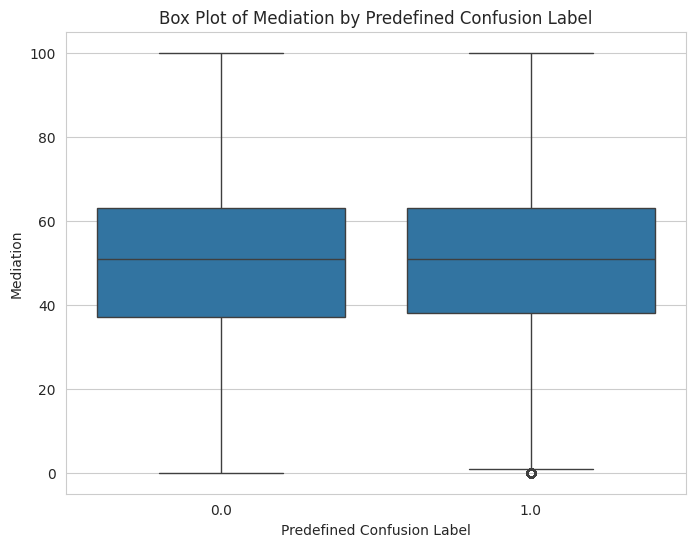

In [11]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.boxplot(x='predefinedlabel', y='Mediation', data=df)
plt.title('Box Plot of Mediation by Predefined Confusion Label')  # Add a title
plt.xlabel('Predefined Confusion Label')  # Label the x-axis
plt.ylabel('Mediation')  # Label the y-axis
plt.show()

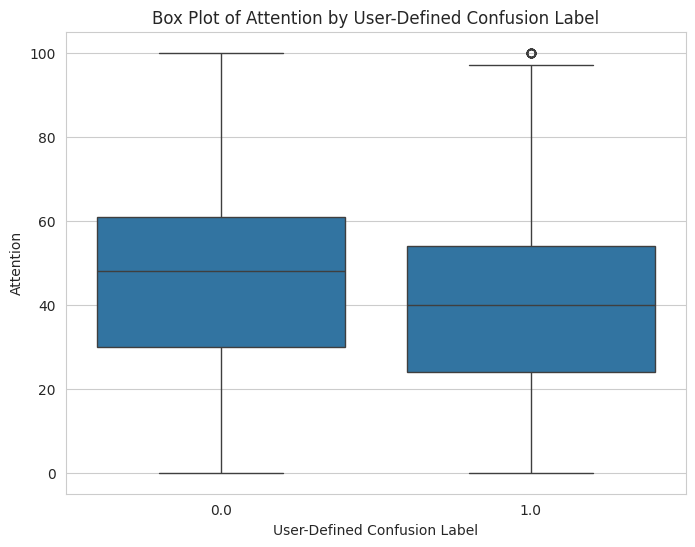

In [12]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.boxplot(x='user-definedlabeln', y='Attention', data=df)
plt.title('Box Plot of Attention by User-Defined Confusion Label')  # Add a title
plt.xlabel('User-Defined Confusion Label')  # Label the x-axis
plt.ylabel('Attention')  # Label the y-axis
plt.show()

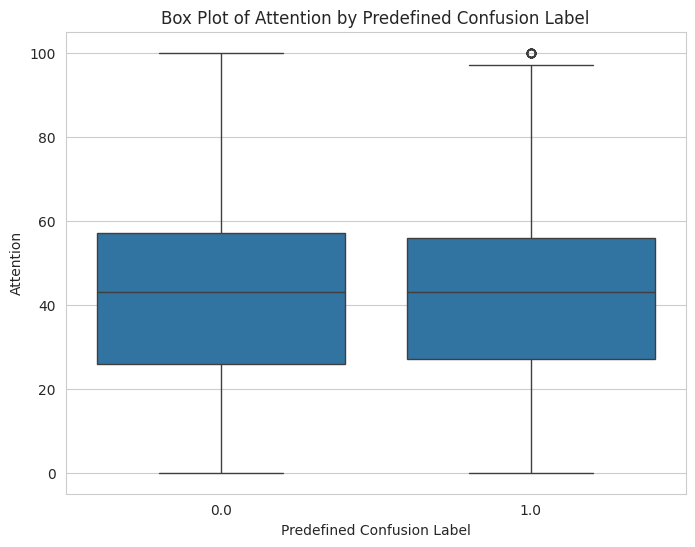

In [13]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.boxplot(x='predefinedlabel', y='Attention', data=df)
plt.title('Box Plot of Attention by Predefined Confusion Label')  # Add a title
plt.xlabel('Predefined Confusion Label')  # Label the x-axis
plt.ylabel('Attention')  # Label the y-axis
plt.show()

In [14]:
# Prepare lists to hold the feature arrays and labels
features = []
labels = []

# Process each unique SubjectID and VideoID combination
for (subject_id, video_id), group in df.groupby(['SubjectID', 'VideoID']):
    n_rows = len(group)
    n_feature_rows = 20  # 10 seconds worth of data
    n_target_rows = 10   # 5 seconds worth of data for labels

    for start_idx in range(0, n_rows - n_feature_rows - n_target_rows + 1, 1):
        # Slicing to create the feature window
        feature_frame = group.iloc[start_idx:start_idx + n_feature_rows]
        # Slicing to create the target window
        target_frame = group.iloc[start_idx + n_feature_rows:start_idx + n_feature_rows + n_target_rows]

        # Calculate the mean of Attention and Mediation in the target window
        mean_attention = target_frame['Attention'].mean()
        mean_mediation = target_frame['Mediation'].mean()

        # Determine the label based on calculated means
        label = 1 if mean_attention < 50 or mean_mediation < 30 else 0
        labels.append(label)

        # Prepare the feature array (excluding SubjectID, VideoID, Attention, Mediation)
        features.append(feature_frame[['Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']].to_numpy())

# Convert lists to arrays for machine learning processing
features = np.array(features)
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Print the shape of datasets as a simple check
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (7928, 20, 9)
Testing features shape: (1983, 20, 9)
Training labels shape: (7928,)
Testing labels shape: (1983,)


In [30]:
data_folder = '/content/drive/My Drive/DL2470 Final Project Group/EEG data/'
np.save(data_folder + 'X_train.npy', X_train)
np.save(data_folder + 'X_test.npy', X_test)
np.save(data_folder + 'y_train.npy', y_train)
np.save(data_folder + 'y_test.npy', y_test)